In [111]:
#importiamo la liberia che permette di navigare sulle cartelle del PC
import os

#importo la libreria statistica pandas
import pandas as pd


#importo le librerie di visualizzazione dei grafici
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#importo la libreria time per rallentare il processo e permettere la visualizzazione delle note
import time 



In [124]:
#carichiamo il programma in memoria per selezionare il dominio ed estrarre i dataset


def seleziona_dominio(selezione = False):
    '''
    restituisce un oggetto con dentro tutti i dataset del singolo dominio
    è possibile accedere al dataset con
    risultato[codice rappresentativo del dataset]
    il codice rappresentativo del dataset è individuabile in nota
    
    '''
    print("seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):")
    lista_domini = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016'))
    dizionario_per_selezione = {}
    for dominio in lista_domini:
        print(dominio)
        dizionario_per_selezione[dominio[0:2]] = dominio
    print("------------------------------------------------------------")
    print("inserisci il codice preselto")    
    if selezione == False:
        a = raw_input()
    else:
        a = str(selezione)
    print("selezionato " + a)
    print("------------------------------------------------------------")
    
    dataset_presenti_dominio = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a]))    
    print("""
    xxxxxx--------------------------------------------xxxxxx
    --------------------------
    ------------
    
    
    
    NOTA DI SEGUITO TROVERETE UNA SEQUENZA DI STRINGHE CHE RAPPRESENTANO I DIVERSI DATASET E IL CODICE CON CUI LO POTRETE RICHIAMARE
    il primo a numero a sinistra, prima della prima virgola, rappresenta il codice con cui richiamare successivamente il dataset
    esempio 1
    (0, u'Regione ', u'Tavola 1.1 - Posti letto nei presidi residenziali socio-assistenziali e socio-sanitari per regione  e ripartizione ')
    per richiamare questo dataset scrivere nella successiva cella dataset_dominio[0]
    
    
    esempio 2
    Cap_02_Istruzione 07.xlsx
    (14, u'REG Maschi-Femmine', u"Tavola 7.1 - Persone di 25-64 anni che hanno partecipato ad attivit\xe0 di istruzione e formazione nelle 4 settimane precedenti l'intervista per sesso,")
    per richiamare questo dataset scrivere nella successiva cella dataset_dominio[14]
    
    ------------
    --------------------------
    xxxxxx--------------------------------------------xxxxxx
    """)
    
    time.sleep(5)
    
    print("ecco la lista dei dataset presenti:")
    print("------------------------------------")
    
    
    
    
    repo_dataset = {}
    nsheet = 0
    for dataset in dataset_presenti_dominio:
        
        print("------------------------------------------------------------")
        print(dataset)
        if dataset[-4:] == "xlsx":
            posizione_del_file = os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a], dataset)
            sheets= pd.read_excel(posizione_del_file, sheetname = None)
            for sheet in sheets.keys():
                try:
                    print(nsheet, sheet, sheets[sheet].iloc[1,0] + " " + sheets[sheet].iloc[2,0] )
                    repo_dataset[nsheet] = sheets[sheet]
                    nsheet += 1
                    print("-------------------------")
                except:
                    print("errore", nsheet, sheet)
                    nsheet += 1
    
    return repo_dataset

In [125]:
dataset_dominio = seleziona_dominio()

seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):
01.Salute
02.Istruzione
03.Lavoro
04.Benessere economico
05.Relazioni sociali
06.Politica e istituzioni
07.Sicurezza
08.Benessere soggettivo
09.Paesaggio e patrimonio culturale
10.Ambiente
11.Ricerca e innovazione
12.Qualit� dei servizi
------------------------------------------------------------
inserisci il codice preselto
12
selezionato 12
------------------------------------------------------------

    xxxxxx--------------------------------------------xxxxxx
    --------------------------
    ------------
    
    
    
    NOTA DI SEGUITO TROVERETE UNA SEQUENZA DI STRINGHE CHE RAPPRESENTANO I DIVERSI DATASET E IL CODICE CON CUI LO POTRETE RICHIAMARE
    il primo a numero a sinistra, prima della prima virgola, rappresenta il codice con cui richiamare successivamente il dataset
    esempio 1
    (0, u'Regione ', u'Tavola 1.1 - Posti letto nei presidi residenziali socio-assistenziali e socio-sani

In [127]:
# a titolo di esempio seleziono il dataset codice 12 del dominio 12.Qualità dei servizi
# u'Tavola 11.1 - Famiglie che dichiarano molta difficolt\xe0 a raggiungere almeno 3 servizi essenziali (a)
esempio = dataset_dominio[12].copy()

In [128]:
#il dataset non è formattato correttamente per analisi statistiche..
esempio

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tavola 11.1 - Famiglie che dichiarano molta di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ripartizione geografica...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REGIONI\nRIPARTIZIONI GEOGRAFICHE,2005-2007,2006-2008,2007-2009,2008-2010,2009-2011,2010-2012,2011-2013,2012-2014,2013-2015
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Piemonte,6.23717,6.03824,6.46043,6.69256,6.77831,5.76549,4.71407,4.53787,4.93459
7,Valle d'Aosta/Vallée d'Aoste,5.14002,5.00308,3.39926,4.32392,4.3123,4.07822,2.62011,4.03645,5.97058
8,Liguria,6.30854,6.46584,8.14937,8.05973,7.44577,6.14576,5.92402,6.05238,5.68308
9,Lombardia,5.80749,5.87336,5.57459,4.99924,4.8593,4.47835,3.91509,3.23535,3.55333


In [129]:
#... quindi lo riportiamo in forma normale 

#1) la riga 4 contiene l'intestazione di colonna e la mettiamo come tale con questa operazione
esempio.columns = esempio.iloc[4]

#2) eliminiamo la riga 4 che ormai è superflua
esempio.drop(4, inplace = True)

In [130]:
#elimino i restanti dati superflui per il calcolo
esempio.dropna(inplace = True)
esempio

4,REGIONI RIPARTIZIONI GEOGRAFICHE,2005-2007,2006-2008,2007-2009,2008-2010,2009-2011,2010-2012,2011-2013,2012-2014,2013-2015
6,Piemonte,6.23717,6.03824,6.46043,6.69256,6.77831,5.76549,4.71407,4.53787,4.93459
7,Valle d'Aosta/Vallée d'Aoste,5.14002,5.00308,3.39926,4.32392,4.3123,4.07822,2.62011,4.03645,5.97058
8,Liguria,6.30854,6.46584,8.14937,8.05973,7.44577,6.14576,5.92402,6.05238,5.68308
9,Lombardia,5.80749,5.87336,5.57459,4.99924,4.8593,4.47835,3.91509,3.23535,3.55333
10,Trentino-Alto Adige/Südtirol,5.47025,5.67202,4.60418,4.71618,4.85265,5.07062,4.91008,4.53461,4.30069
11,Bolzano/Bozen,4.66274,4.68399,3.53494,3.78297,2.98883,3.80548,3.59749,4.64535,4.37321
12,Trento,6.2106,6.57439,5.58287,5.57563,6.56501,6.2392,6.13114,4.431,4.23332
13,Veneto,7.3907,6.48632,6.17855,5.98735,5.61473,5.84689,5.37312,5.59322,5.32032
14,Friuli-Venezia Giulia,5.96727,6.06949,5.17758,4.54027,4.22349,4.86211,5.23507,5.1603,5.34635
15,Emilia-Romagna,6.4734,5.77263,5.91535,6.14016,6.07767,5.55599,5.48242,6.246,6.56886


In [131]:
#inserisco la regione come indice e non come dato


In [132]:
esempio.set_index(esempio.columns[0], inplace = True)

In [133]:
# numero indice base 100 

In [134]:
esempio.divide(esempio[esempio.columns[0]], axis = 0) * 100
# bug identificato, per compiere questa operazione i valori dell'intestazione colonna devono essere tutti dello stesso tipo

4,2005-2007,2006-2008,2007-2009,2008-2010,2009-2011,2010-2012,2011-2013,2012-2014,2013-2015
REGIONI RIPARTIZIONI GEOGRAFICHE,,,,,,,,,
Piemonte,100,96.8106,103.579,107.301,108.676,92.4376,75.5802,72.7552,79.1158
Valle d'Aosta/Vallée d'Aoste,100,97.3358,66.1331,84.1226,83.8966,79.3424,50.9748,78.5298,116.159
Liguria,100,102.494,129.18,127.759,118.027,97.4197,93.9049,95.9395,90.0856
Lombardia,100,101.134,95.9897,86.0826,83.6729,77.1134,67.4145,55.71,61.1853
Trentino-Alto Adige/Südtirol,100,103.688,84.1675,86.215,88.7098,92.6944,89.7596,82.8957,78.6196
Bolzano/Bozen,100,100.456,75.8126,81.1319,64.1003,81.6148,77.1541,99.6271,93.7906
Trento,100,105.858,89.8926,89.776,105.707,100.461,98.7206,71.3457,68.1628
Veneto,100,87.7633,83.599,81.0119,75.9702,79.1114,72.701,75.6792,71.9866
Friuli-Venezia Giulia,100,101.713,86.7664,76.0864,70.7777,81.4796,87.7297,86.4767,89.5947


In [135]:
esempio_numero_indice = esempio.divide(esempio[esempio.columns[0]], axis = 0) * 100
esempio_numero_indice

4,2005-2007,2006-2008,2007-2009,2008-2010,2009-2011,2010-2012,2011-2013,2012-2014,2013-2015
REGIONI RIPARTIZIONI GEOGRAFICHE,,,,,,,,,
Piemonte,100,96.8106,103.579,107.301,108.676,92.4376,75.5802,72.7552,79.1158
Valle d'Aosta/Vallée d'Aoste,100,97.3358,66.1331,84.1226,83.8966,79.3424,50.9748,78.5298,116.159
Liguria,100,102.494,129.18,127.759,118.027,97.4197,93.9049,95.9395,90.0856
Lombardia,100,101.134,95.9897,86.0826,83.6729,77.1134,67.4145,55.71,61.1853
Trentino-Alto Adige/Südtirol,100,103.688,84.1675,86.215,88.7098,92.6944,89.7596,82.8957,78.6196
Bolzano/Bozen,100,100.456,75.8126,81.1319,64.1003,81.6148,77.1541,99.6271,93.7906
Trento,100,105.858,89.8926,89.776,105.707,100.461,98.7206,71.3457,68.1628
Veneto,100,87.7633,83.599,81.0119,75.9702,79.1114,72.701,75.6792,71.9866
Friuli-Venezia Giulia,100,101.713,86.7664,76.0864,70.7777,81.4796,87.7297,86.4767,89.5947


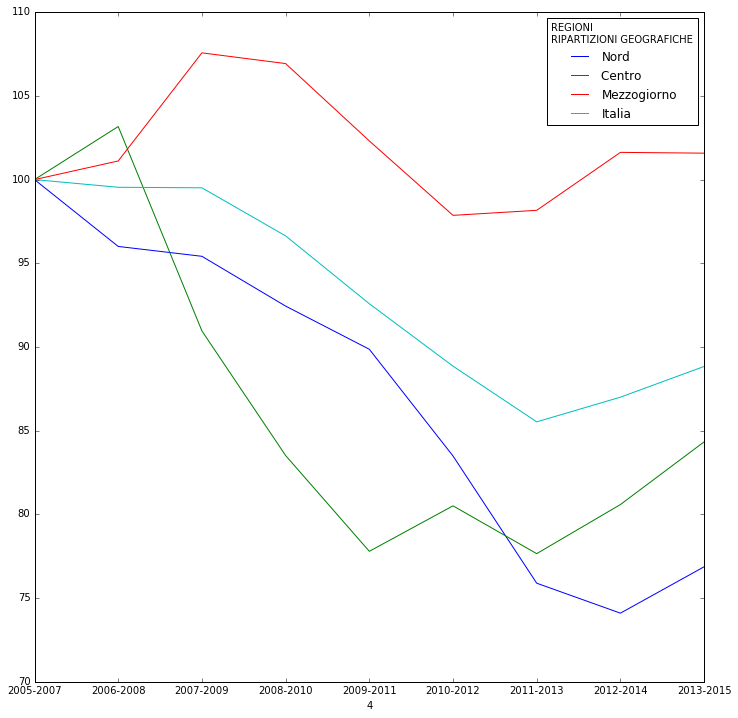

In [137]:
esempio_numero_indice.loc[["Nord", "Centro ", "Mezzogiorno", "Italia"]].T.plot(figsize = (12,12))

In [ ]:
#funzione alternativa 

def seleziona_dataset():
    '''questa funzione permette di accedere al singolo dataset seguendo una procedura guidata'''
    print("seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):")
    lista_domini = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016'))
    dizionario_per_selezione = {}
    for dominio in lista_domini:
        print(dominio)
        dizionario_per_selezione[dominio[0:2]] = dominio
    print(" ")
    print("inserisci il codice preselto")    
    a = raw_input()
    print("selezionato " + a)
    print(" ")
    
    dataset_presenti_dominio = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a]))    
    print("ecco la lista dei dataset presenti")
    for dataset in enumerate(dataset_presenti_dominio):
        print(str(dataset[0]) + " " + dataset[1])
    print(" ")
    print("seleziona il dataset, utilizzando il codice ad inizio riga (es, Cap_10_Ambiente 01.xlsx = 0)")
    b = raw_input()
    posizione_del_file = os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a], dataset_presenti_dominio[int(b)])
    return pd.read_excel(posizione_del_file, sheetname = None)